## Градиентный бустинг

In [16]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import roc_auc_score
import datetime

features = pd.read_csv('features.csv', index_col='match_id')

############################### Градиентный бустинг ##############################
#данные, которые известны по первым пяти минутам
features_X = features.ix[:,0:102]
features_X = features_X.fillna(0)

# Поскольку мы пытаемся определить, кто выиграл матч, то столбец, который содержит целевую переменную - radiant_win.
features_y = np.ravel(features.ix[:,'radiant_win':'radiant_win'])

# выведу на печать названия столбцов с пропусками
for i in range(102):
    if features_X.ix[:,i:i+1].count()[0] < len(features_X.ix[:,0:1]):
        print(features_X.ix[:,i:i+1].columns.values[0])

# аналогично, но в одну строку
#features_with_pass = [features_clean.ix[:,i:i+1].columns.values[0] for i in range(102) if features_clean.ix[:,i:i+1].count()[0] < len(features_clean.ix[:,i:i+1])]
#print(features_with_pass)


# cross-validation
# проводим по пяти блокам
kf = KFold(len(features_X.ix[:,0:1]), n_folds=5,random_state=13, shuffle=True)

est = [] #estimations
start_time = datetime.datetime.now()
for num_tree in [5,10,20,30,40,45,50,55,60,65,70]:
    clf = GBC(n_estimators=num_tree,random_state=13)
    Pred = clf.fit(features_X, features_y)
    Estimation = cross_val_score(Pred, features_X, y=features_y, scoring='roc_auc', cv=kf).mean()
    est.append(Estimation)
    print(num_tree, Estimation)
    print("Time of work = ", datetime.datetime.now() - start_time)
    start_time = datetime.datetime.now()

# Выведу список оценок 
print(est)



5 0.634705531722
Time of work =  0:01:01.758262
10 0.664587137728
Time of work =  0:01:57.444897
20 0.682015122953
Time of work =  0:03:52.778148
30 0.689156519957
Time of work =  0:05:45.002559
40 0.694262120354
Time of work =  0:07:38.051232
45 0.696057085524
Time of work =  0:08:39.966769
50 0.697546279241
Time of work =  0:09:37.326525
55 0.69880283734
Time of work =  0:10:36.979186
60 0.699974098913
Time of work =  0:11:44.643634
65 0.701096062688
Time of work =  0:12:37.893317
70 0.702029755609
Time of work =  0:13:38.010306
[0.63470553172218414, 0.66458713772835831, 0.6820151229527236, 0.68915651995687222, 0.69426212035371271, 0.69605708552422896, 0.69754627924141155, 0.69880283734005899, 0.69997409891289608, 0.70109606268792712, 0.70202975560910919]


### График изменения качества  от числа деревье

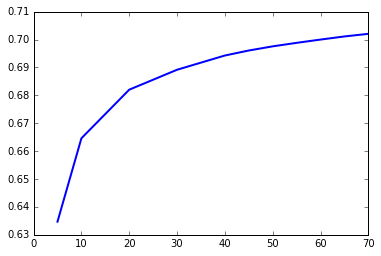

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
num_tree = [5,10,20,30,40,45,50,55,60,65,70]
Estimation = [0.63470553172218414, 0.66458713772835831, 0.6820151229527236, 0.68915651995687222, 0.69426212035371271, 0.69605708552422896, 0.69754627924141155, 0.69880283734005899, 0.69997409891289608, 0.70109606268792712, 0.70202975560910919]

plt.plot(num_tree, Estimation, linewidth=2)

### Целевая переменная
Поскольку мы пытаемся определить, кто выиграл матч, то столбец, который содержит целевую переменную - __radiant_win__.

### Признаки, пропущенные для 12 столбцов:
first_blood_time,
first_blood_team,
first_blood_player1,
first_blood_player2,
radiant_bottle_time,
radiant_courier_time,
radiant_flying_courier_time,
radiant_first_ward_time,
dire_bottle_time,
dire_courier_time,
dire_flying_courier_time,
dire_first_ward_time.

Первым 4-м событиям соотвествует момент первого убийства героя в игре. Раз есть пропуски, значит к 6-й минуте ни одного убийства совершено не было. Это может говорить о том, что уровень игроков в командах примерый равный, игроки, скорее, всего осторожничают:)
Далее 8 признаков, по четыре для каждой команды. Есть пропуск, значит никто не преобретал предметы bootle, courier, flying_courier, наблюдатель также не был установлен.

### Время выполнения кросс-валидации. Качество.
Для градиентного бустинга с 30 деревьями 5 минут 45 секунд (железо Core i3 2.24GHz, 3MB L2 cash).
Качество примерно 0,689 в этом случае.

Изменял количество деревьев с 5 до 70. Мне кажется, что есть смысл использовать 40 деревьев, а вот больше - уже вопрос. При росте числа деревьев с 30 до 40 качество классификации растёт на 0,005, то есть на 0,5%, а вот при росте с 40 до 70 - 0,8%. При этом время обучения увеличивавется с 7 минут 38 сек до 13 минут 38 секунд.

### Уменьшения временным затрат
Для этого, как предлагается разработчиками, можно сделать подвыборку и уменьшить число деревьев.

### Уменьшение глубины дерева
Попробую уменьшить глубину дерева с 3 до 2 и оценить влияение этого фактора на время выполнения

In [19]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import roc_auc_score
import datetime

features = pd.read_csv('features.csv', index_col='match_id')

############################### Градиентный бустинг ##############################
#данные, которые известны по первым пяти минутам
features_X = features.ix[:,0:102]
features_X = features_X.fillna(0)

# Поскольку мы пытаемся определить, кто выиграл матч, то столбец, который содержит целевую переменную - radiant_win.
features_y = np.ravel(features.ix[:,'radiant_win':'radiant_win'])

# cross-validation
# проводим по пяти блокам
kf = KFold(len(features_X.ix[:,0:1]), n_folds=5,random_state=13, shuffle=True)

start_time = datetime.datetime.now()

clf = GBC(n_estimators=30,random_state=13, max_depth=2)
Pred = clf.fit(features_X, features_y)
Estimation = cross_val_score(Pred, features_X, y=features_y, scoring='roc_auc', cv=kf).mean()
print("Качество = ", Estimation)
print("Time of work = ", datetime.datetime.now() - start_time)


Качество =  0.682005440034
Time of work =  0:03:56.700292


Видно, что время работы сократилось примерно на 1 минуту и вместо 5 минут 45 секунд стало 3 минуты 57 секунд. Качество при этом упало на 0,7%, с 0,689 до 0,682. 
Мне кажется, такая оптимизация не очень хороша, слишком много теряем в качестве.

## Логистическая регрессия

На первом этапе нормализую значения, затем проверю, с каким значением С результат получается наиболее точным.

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as LR

features = pd.read_csv('features.csv', index_col='match_id')

############################### Градиентный бустинг ##############################
#данные, которые известны по первым пяти минутам
features_X = features.ix[:,0:102]
features_X = features_X.fillna(0)

# Поскольку мы пытаемся определить, кто выиграл матч, то столбец, который содержит целевую переменную - radiant_win.
features_y = np.ravel(features.ix[:,'radiant_win':'radiant_win'])

kf = KFold(len(features_X.ix[:,0:1]), n_folds=5, random_state=13, shuffle=True)

# Нормализую признаки
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_X)

start_time = datetime.datetime.now()
Est_max = 0
C_max = 0
for C in [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100, 1000, 10000]:
    log = LR(penalty='l2',C=C)
    Pred = log.fit(X_scaled, features_y)
    Estimation = cross_val_score(Pred, X_scaled, y=features_y, scoring="roc_auc", cv=kf).mean()
    if Estimation > Est_max:
        Est_max = Estimation
        C_max = C
    print(C, Estimation)
    print("Time of work = ", datetime.datetime.now() - start_time)
    start_time = datetime.datetime.now()
print("C_max = ", C_max, "Est_max = ", Est_max)

0.0001 0.71116651754
Time of work =  0:00:12.009498
0.001 0.716162440279
Time of work =  0:00:23.725271
0.01 0.716365263911
Time of work =  0:00:30.622088
0.1 0.716343288358
Time of work =  0:00:31.171823
1.0 0.716338851814
Time of work =  0:00:30.861070
10 0.716338659243
Time of work =  0:00:30.419523
100 0.716338597882
Time of work =  0:00:29.644611
1000 0.716338572489
Time of work =  0:00:29.246702
10000 0.716338565074
Time of work =  0:00:29.553985
C_max =  0.01 Est_max =  0.716365263911


Как видно выше, наилучший результат достигнут при С = 0,01 (судя по описанию С, это значит, что регуляризация проведена жестко). Наилучший результат предсказания - 0,716. Странно, что значение лучше, чем в случае градиентного бустинга.
При этом скорость работы логистической регрессии на порядок выше: вместо 5-10 минут она выполняется 30 секунд.

### Удаление категориальных признаков
Удалю столбцы с категориальными признаками и проверю качество классификации после этого

In [13]:
features_X.drop('lobby_type', axis = 1, inplace=True)
features_X.drop('r1_hero', axis = 1, inplace=True)
features_X.drop('r2_hero', axis = 1, inplace=True)
features_X.drop('r3_hero', axis = 1, inplace=True)
features_X.drop('r4_hero', axis = 1, inplace=True)
features_X.drop('r5_hero', axis = 1, inplace=True)
features_X.drop('d1_hero', axis = 1, inplace=True)
features_X.drop('d2_hero', axis = 1, inplace=True)
features_X.drop('d3_hero', axis = 1, inplace=True)
features_X.drop('d4_hero', axis = 1, inplace=True)
features_X.drop('d5_hero', axis = 1, inplace=True)


In [14]:
kf = KFold(len(features_X.ix[:,0:1]), n_folds=5, random_state=13, shuffle=True)

# Нормализую признаки
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_X)

start_time = datetime.datetime.now()
Est_max = 0
C_max = 0
for C in [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100, 1000, 10000]:
    log = LR(penalty='l2',C=C)
    Pred = log.fit(X_scaled, features_y)
    Estimation = cross_val_score(Pred, X_scaled, y=features_y, scoring="roc_auc", cv=kf).mean()
    if Estimation > Est_max:
        Est_max = Estimation
        C_max = C
    print(C, Estimation)
    print("Time of work = ", datetime.datetime.now() - start_time)
    start_time = datetime.datetime.now()
print("C_max = ", C_max, "Est_max = ", Est_max)

0.0001 0.711191507509
Time of work =  0:00:11.043414
0.001 0.716232573193
Time of work =  0:00:20.005264
0.01 0.71642978577
Time of work =  0:00:26.350675
0.1 0.716409710153
Time of work =  0:00:28.047257
1.0 0.716406667309
Time of work =  0:00:28.254835
10 0.716406360334
Time of work =  0:00:27.873628
100 0.716406185612
Time of work =  0:00:27.964491
1000 0.716406176098
Time of work =  0:00:28.068867
10000 0.716406196218
Time of work =  0:00:28.234604
C_max =  0.01 Est_max =  0.71642978577


Незначительно, на 0.00006, то есть на 0,006% отличаются результаты по сравнению с результатами с учётом категориальных признаков.  Вероятно, у удалённых признаков были незначительные веса.

### Подсчёт уникальных героев
Объединил множества героев, чтобы не смотреть каждое по отдельности для radiant и dare.
Получилось 108 уникальных героев. Индексы 24, 107, 108, 111 не попадаются в выборке. Последний используемый индекс - 112.

In [15]:
features = pd.read_csv('features.csv', index_col='match_id')
# данные, которые известны по первым пяти минутам
features_X = features.ix[:,0:102]
features_X = features_X.fillna(0)

Index_of_r1_hero, Count = np.unique(features_X.ix[:,'r1_hero'], return_counts=True)
Index_of_r2_hero, Count = np.unique(features_X.ix[:,'r2_hero'], return_counts=True)
Index_of_r3_hero, Count = np.unique(features_X.ix[:,'r3_hero'], return_counts=True)
Index_of_r4_hero, Count = np.unique(features_X.ix[:,'r4_hero'], return_counts=True)
Index_of_r5_hero, Count = np.unique(features_X.ix[:,'r5_hero'], return_counts=True)
Index_of_d1_hero, Count = np.unique(features_X.ix[:,'d1_hero'], return_counts=True)
Index_of_d2_hero, Count = np.unique(features_X.ix[:,'d2_hero'], return_counts=True)
Index_of_d3_hero, Count = np.unique(features_X.ix[:,'d3_hero'], return_counts=True)
Index_of_d4_hero, Count = np.unique(features_X.ix[:,'d4_hero'], return_counts=True)
Index_of_d5_hero, Count = np.unique(features_X.ix[:,'d5_hero'], return_counts=True)

Index_of_r = Index_of_r1_hero | Index_of_r2_hero | Index_of_r3_hero | Index_of_r4_hero | Index_of_r5_hero
Index_of_d = Index_of_d1_hero | Index_of_d2_hero | Index_of_d3_hero | Index_of_d4_hero | Index_of_d5_hero

# Взял 120, потому посмотрел, что 108 уникальных элементов и чтобы с запасом все это закрыть.

for i in range(1,120):
    if i not in Index_of_r:
        print("Hero with index = ", i, "is absent.")
print(len(Index_of_r))

for i in range(1,120):
    if i not in Index_of_d:
        print("Hero with index = ", i, "is absent.")
print(len(Index_of_d))

Hero with index =  24 is absent.
Hero with index =  107 is absent.
Hero with index =  108 is absent.
Hero with index =  111 is absent.
Hero with index =  113 is absent.
Hero with index =  114 is absent.
Hero with index =  115 is absent.
Hero with index =  116 is absent.
Hero with index =  117 is absent.
Hero with index =  118 is absent.
Hero with index =  119 is absent.
108
Hero with index =  24 is absent.
Hero with index =  107 is absent.
Hero with index =  108 is absent.
Hero with index =  111 is absent.
Hero with index =  113 is absent.
Hero with index =  114 is absent.
Hero with index =  115 is absent.
Hero with index =  116 is absent.
Hero with index =  117 is absent.
Hero with index =  118 is absent.
Hero with index =  119 is absent.
108


### Добавление новых признаков
Признаки, основанные на участие или не участие героев в матче.

In [16]:
from sklearn.preprocessing import StandardScaler

# поскокльку выше удалил уже категориальные признаки, считаю массив снова и перепишу выборку features_X
features_X = features.ix[:,0:102]
features_X = features_X.fillna(0)

# Теперь создам столбцы, каждый из которых соотвествует герою и отражает участие его в матче и сторону,
# за которую он выступал. Для начала они будут отдельным массивом
X_pick = np.zeros((features_X.shape[0], 112))
for i, match_id in enumerate(features_X.index):
    for p in range(1,6):
        X_pick[i, features_X.ix[match_id, 'r%d_hero' % p]-1] = 1
        X_pick[i, features_X.ix[match_id, 'd%d_hero' % p]-1] = -1

# Теперь можно удалить столбцы с категорийными признаками из начального массива
# П.С. Понял, что удаляю не красиво:):)
features_X.drop('lobby_type', axis = 1, inplace=True)
features_X.drop('r1_hero', axis = 1, inplace=True)
features_X.drop('r2_hero', axis = 1, inplace=True)
features_X.drop('r3_hero', axis = 1, inplace=True)
features_X.drop('r4_hero', axis = 1, inplace=True)
features_X.drop('r5_hero', axis = 1, inplace=True)
features_X.drop('d1_hero', axis = 1, inplace=True)
features_X.drop('d2_hero', axis = 1, inplace=True)
features_X.drop('d3_hero', axis = 1, inplace=True)
features_X.drop('d4_hero', axis = 1, inplace=True)
features_X.drop('d5_hero', axis = 1, inplace=True)

# Склею массива
X = np.concatenate((features_X, X_pick), axis=1)

# Ответы на обучающей выборке
y = np.ravel(features.ix[:,'radiant_win':'radiant_win'])

# Кросс-валидация
kf = KFold(len(features_X.ix[:,0:1]), n_folds=5, random_state=13, shuffle=True)

# Нормализую признаки
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Проверю, какое С является наилучшим в этом случае
Est_max = 0
C_max = 0
for C in [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100, 1000, 10000]:
    log = LR(penalty='l2',C=C)
    Pred = log.fit(X_scaled, features_y)
    Estimation = cross_val_score(Pred, X_scaled, y=features_y, scoring="roc_auc", cv=kf).mean()
    if Estimation > Est_max:
        Est_max = Estimation
        C_max = C
    print(C, Estimation)
print("C_max = ", C_max, "Est_max = ", Est_max)


0.0001 0.74276768024
0.001 0.75161128273
0.01 0.751961835254
0.1 0.75192996745
1.0 0.751926015046
10 0.751924912234
100 0.751924758606
1000 0.751924748001
10000 0.751924735286
C_max =  0.01 Est_max =  0.751961835254


Качество получилось лучше, чем при когда эти признаки не используются. При том существенно. Наилуший вариант получился опять же при использовании параметра С = 0,01. Верный ответ выдавался в 75,20 вариантах, что практически на 3,6%, чем без использования этих признаков.
Причина, как мне кажется в том, что есть герои сильные, а есть слабые. И от выбора героя многое зависит (другими словами, на предыдущем шаге мы искусственно ослабляли наши исходные данные
). И учёт этих признаков сильно повышает качество классификации.

### Обучение итогового алгоритма логистической регрессии
Использую наилучшее значение коэффициента С = 0,01. 

In [17]:
# Считаю тестовую выборку
Test = pd.read_csv('features_test.csv', index_col="match_id").ix[:,:]
Test = Test.fillna(0)

# Займус "категориальных признаков"
Pick_test = np.zeros((Test.shape[0], 112))

for i, match_id in enumerate(Test.index):
    for p in range(1,6):
        Pick_test[i, Test.ix[match_id, 'r%d_hero' % p]-1] = 1
        Pick_test[i, Test.ix[match_id, 'd%d_hero' % p]-1] = -1

Test.drop('lobby_type', axis = 1, inplace=True)
Test.drop('r1_hero', axis = 1, inplace=True)
Test.drop('r2_hero', axis = 1, inplace=True)
Test.drop('r3_hero', axis = 1, inplace=True)
Test.drop('r4_hero', axis = 1, inplace=True)
Test.drop('r5_hero', axis = 1, inplace=True)
Test.drop('d1_hero', axis = 1, inplace=True)
Test.drop('d2_hero', axis = 1, inplace=True)
Test.drop('d3_hero', axis = 1, inplace=True)
Test.drop('d4_hero', axis = 1, inplace=True)
Test.drop('d5_hero', axis = 1, inplace=True)

Test_en = np.concatenate((Test, Pick_test), axis=1)
Test_scaled = scaler.fit_transform(Test_en)

# Использую оптимальный С и отмаштабированный уже X_scaled чтобы обучить алгоритм
log = LR(penalty='l2',C=0.01)
log.fit(X_scaled, y)

# Получу массив вероятноятностей побед команд.
y_pred = log.predict_proba(Test_scaled)

# Выведу на печать значения минимальной и максимальной вероятностей для каждого из столбцов
# для того, чтобы убедиться, что они находятся внутри отрезка [0,1].
print(max(y_pred[:,0]), min(y_pred[:,0]), max(y_pred[:,1]), min(y_pred[:,1]))

0.991294099231 0.00367128407457 0.996328715925 0.00870590076923


Видно, что значения вероятностей лежат в пределах отрезка [0,1]